# Pemodelan

In [91]:
#import lib
import csv
import pandas as pd
import numpy as np
import string
import re
import nltk

#
import matplotlib.pyplot as plt
import seaborn as sns

# Analisi Sentimen

### Source CODE dari
https://github.com/commitunuja/analisis-sentimen-naive-bayes-tf-idf/blob/master/.ipynb_checkpoints/Untitled-checkpoint.ipynb

Jumlah data awal: 8000
Jumlah data yang sama: 34
Jumlah data sekarang: 7966


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


758
0       [selamat, malam, first, people, mohon, maaf, k...
1                               [mohon, memeriksa, pesan]
2       [hi, first, people, merespon, via, pesan, sila...
3       [estimasi, perbaikan, oktober, wib, informasi,...
4                                                   [tks]
                              ...                        
7995                               [, rusak, dah, elahhh]
7996    [selamat, sore, first, people, mhn, maaf, keti...
7997    [selamat, malam, first, people, pengecekan, ke...
7998    [hi, first, people, terima, kasih, konfirmasin...
7999    [selamat, siang, first, people, bantu, respon,...
Name: Data Teks_Stopword, Length: 7966, dtype: object
Jumlah data prepo: 6385
                  Kata  Banyak
0                first    2909
1               people    2541
2                mohon    2338
3                  tks    2046
4                 maaf    1944
5              selamat    1410
6   ketidaknyamanannya    1203
7             jaringan    1202
8

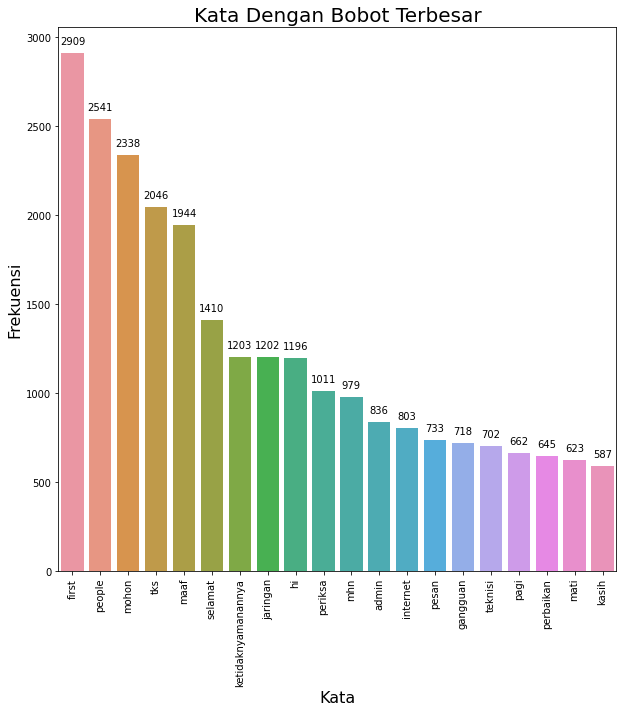

negatif    4172
positif    1746
netral      467
Name: sentimen, dtype: int64
Jumlah data lex: 6385


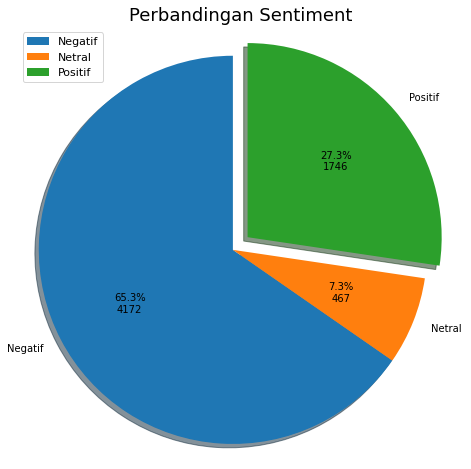

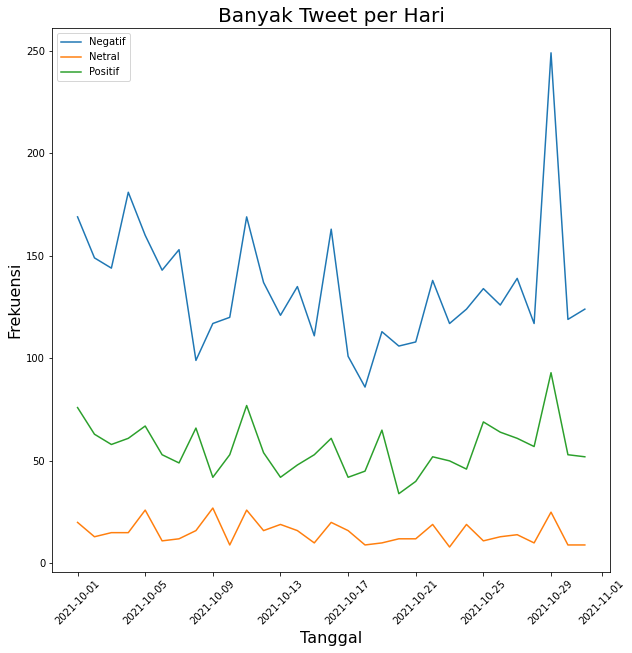

In [92]:
%run S_4_Analisis_sentimen.ipynb

# Naive Bayes Classifier in Python KAGGLE
https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python

In [93]:
datax = pd.read_csv('E:\Program\[2] Program\AnSent\Data\Data_5_Lex_sen\Lex_Firstmediacares.csv')

# menghapus kolom
del datax['Unnamed: 0.1']
del datax['Unnamed: 0']
# data.rename( columns={'Unnamed: 0':'Indeks'}, inplace=True )
data = datax.copy()


### Prediction TF-IDF

In [94]:
# convert list formated string to list
import ast
import numpy as np
index = 0

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

data['Data Teks_List'] = data['Data Teks_Token'].apply(convert_text_list)


print(data['Data Teks_List'][index])

print('\ntype : ', type(data['Data Teks_List']))

['selamat', 'malam', 'first', 'people', 'mohon', 'maaf', 'atas', 'ketidaknyamanan', 'yang', 'dialami', 'agar', 'bisa', 'dibantu', 'periksa', 'lebih', 'lanjut', 'silakan', 'follow', 'akun', 'kami', 'dan', 'mohon', 'info', 'digit', 'nomor', 'pelanggan', 'via', 'pesan', 'terima', 'kasih', 'fuj']

type :  <class 'pandas.core.series.Series'>


In [95]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

data["TF_dict"] = data['Data Teks_List'].apply(calc_TF)

data["TF_dict"].head()

0    {'selamat': 0.03225806451612903, 'malam': 0.03...
1    {'mohon': 0.25, 'memeriksa': 0.25, 'pesan': 0....
2    {'hi': 0.0625, 'first': 0.0625, 'people': 0.06...
3    {'adapun': 0.05263157894736842, 'estimasi': 0....
4                            {'baik': 0.5, 'tks': 0.5}
Name: TF_dict, dtype: object

In [96]:
print('%20s' % "term", "\t", "TF\n")
for key in data["TF_dict"][index]:
    print('%20s' % key, "\t", data["TF_dict"][index][key])

                term 	 TF

             selamat 	 0.03225806451612903
               malam 	 0.03225806451612903
               first 	 0.03225806451612903
              people 	 0.03225806451612903
               mohon 	 0.06451612903225806
                maaf 	 0.03225806451612903
                atas 	 0.03225806451612903
     ketidaknyamanan 	 0.03225806451612903
                yang 	 0.03225806451612903
             dialami 	 0.03225806451612903
                agar 	 0.03225806451612903
                bisa 	 0.03225806451612903
             dibantu 	 0.03225806451612903
             periksa 	 0.03225806451612903
               lebih 	 0.03225806451612903
              lanjut 	 0.03225806451612903
             silakan 	 0.03225806451612903
              follow 	 0.03225806451612903
                akun 	 0.03225806451612903
                kami 	 0.03225806451612903
                 dan 	 0.03225806451612903
                info 	 0.03225806451612903
               digit 	 0.03

In [97]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data["TF_dict"])

In [98]:
n_document = len(data)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [99]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
data["TF-IDF_dict"] = data["TF_dict"].apply(calc_TF_IDF)

In [100]:
print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", data["TF_dict"][index][key] ,"\t" , data["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

             selamat 	 0.03225806451612903 	 0.04881299019664611
               malam 	 0.03225806451612903 	 0.08184349481262192
               first 	 0.03225806451612903 	 0.027301890296889078
              people 	 0.03225806451612903 	 0.029735077692066365
               mohon 	 0.06451612903225806 	 0.08051596907270546
                maaf 	 0.03225806451612903 	 0.03839461676178611
                atas 	 0.03225806451612903 	 0.04480517426007456
     ketidaknyamanan 	 0.03225806451612903 	 0.1357364476408419
                yang 	 0.03225806451612903 	 0.08184349481262192
             dialami 	 0.03225806451612903 	 0.14379489275040225
                agar 	 0.03225806451612903 	 0.09907571981105094
                bisa 	 0.03225806451612903 	 0.053469763725132666
             dibantu 	 0.03225806451612903 	 0.11953099881026877
             periksa 	 0.03225806451612903 	 0.06277634769007445
               lebih 	 0.032258

In [101]:
# sort descending by value for DF dictionary 
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

# Create a list of unique words from sorted dictionay `sorted_DF`
unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

data["TF_IDF_Vec"] = data["TF-IDF_dict"].apply(calc_TF_IDF_Vec)

print("print first row matrix TF_IDF_Vec Series\n")
print(data["TF_IDF_Vec"][0])

print("\nmatrix size : ", len(data["TF_IDF_Vec"][0]))

print first row matrix TF_IDF_Vec Series

[0.027301890296889078, 0.029735077692066365, 0.0, 0.0, 0.03839461676178611, 0.08051596907270546, 0.041422662105453256, 0.0, 0.04480517426007456, 0.0, 0.04742098578361867, 0.04881299019664611, 0.053469763725132666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06277634769007445, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07177468293146241, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07759997121841124, 0.0, 0.0785663643648884, 0.0, 0.0, 0.0, 0.08184349481262192, 0.08184349481262192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08520675321018352, 0.0, 0.0]

matrix size :  50


In [102]:
data.to_csv('E:\Program\[2] Program\AnSent\Data\Data_8_Pemod\Mod_Indihome.csv')
data

,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen,Data Teks_List,TF_dict,TF-IDF_dict,TF_IDF_Vec
0,2021-10-19 14:48:25+00:00,FirstMediaCares,"@adoths Selamat malam FIRST People, Mohon maa...",selamat malam first people mohon maaf atas ket...,selamat malam first people mohon maaf atas ket...,"['selamat', 'malam', 'first', 'people', 'mohon...","['selamat', 'malam', 'first', 'people', 'mohon...",selamat malam first people mohon maaf ketidakn...,-10,negatif,"[selamat, malam, first, people, mohon, maaf, a...","{'selamat': 0.03225806451612903, 'malam': 0.03...","{'selamat': 0.04881299019664611, 'malam': 0.08...","[0.027301890296889078, 0.029735077692066365, 0..."
1,2021-10-30 16:40:56+00:00,FirstMediaCares,@DanielVHD Mohon check DM anda.,mohon check dm anda,mohon memeriksa pesan kamu,"['mohon', 'memeriksa', 'pesan', 'kamu']","['mohon', 'memeriksa', 'pesan']",mohon memeriksa pesan,-6,negatif,"[mohon, memeriksa, pesan, kamu]","{'mohon': 0.25, 'memeriksa': 0.25, 'pesan': 0....","{'mohon': 0.3119993801567337, 'memeriksa': 1.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3119993801567337, ..."
2,2021-10-13 05:30:28+00:00,FirstMediaCares,@akhyaroy Hi First People. Kami sudah merespon...,hi first people kami sudah merespon via dm sil...,hi first people kami sudah merespon via pesan...,"['hi', 'first', 'people', 'kami', 'sudah', 'me...","['hi', 'first', 'people', 'merespon', 'via', '...",hi first people merespon via pesan silakan dic...,8,positif,"[hi, first, people, kami, sudah, merespon, via...","{'hi': 0.0625, 'first': 0.0625, 'people': 0.06...","{'hi': 0.1046855521222539, 'first': 0.05289741...","[0.05289741245022259, 0.057611713028378586, 0...."
3,2021-10-30 05:43:35+00:00,FirstMediaCares,@soeguss Adapun estimasi perbaikan hingga 30 O...,adapun estimasi perbaikan hingga oktober puk...,adapun estimasi perbaikan hingga oktober puk...,"['adapun', 'estimasi', 'perbaikan', 'hingga', ...","['estimasi', 'perbaikan', 'oktober', 'wib', 'i...",estimasi perbaikan oktober wib informasi probl...,-5,negatif,"[adapun, estimasi, perbaikan, hingga, oktober,...","{'adapun': 0.05263157894736842, 'estimasi': 0....","{'adapun': 0.26442300790438267, 'estimasi': 0....","[0.0, 0.0, 0.0, 0.05992387894682828, 0.0, 0.0,..."
4,2021-10-28 08:20:58+00:00,DediBudiawan2,@FirstMediaCares Baik tks,baik tks,baik tks,"['baik', 'tks']",['tks'],tks,2,positif,"[baik, tks]","{'baik': 0.5, 'tks': 0.5}","{'baik': 1.5528574788233935, 'tks': 0.56927684...","[0.0, 0.0, 0.0, 0.5692768499948687, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6380,2021-10-21 14:30:25+00:00,Sora85204480,@FirstMediaCares min tkong 10010317 di website...,min tkong di website tulisnya online gpi wifi...,admin tkong di website tulisnya online gpi w...,"['', 'admin', 'tkong', 'di', 'website', 'tulis...","['', 'admin', 'tkong', 'website', 'tulisnya', ...",admin tkong website tulisnya online gpi wifin...,0,netral,"[, admin, tkong, di, website, tulisnya, online...","{'': 0.08333333333333333, 'admin': 0.083333333...","{'': 0.16716148720686533, 'admin': 0.179926573...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6381,2021-10-04 03:52:02+00:00,FirstMediaCares,"@Thunder_M_P Selamat pagi First people, mohon ...",m p selamat pagi first people mohon maaf atas ...,m p selamat pagi first people mohon maaf atas ...,"['m', 'p', 'selamat', 'pagi', 'first', 'people...","['m', 'p', 'selamat', 'pagi', 'first', 'people...",m p selamat pagi first people mohon maaf ketid...,-12,negatif,"[m, p, selamat, pagi, first, people, mohon, ma...","{'m': 0.041666666666666664, 'p': 0.04166666666...","{'m': 0.29041447080160765, 'p': 0.278427717782...","[0.035264941633481726, 0.03840780868558572, 0...."
6382,2021-10-11 04:00:34+00:00,rayhankafii,@FirstMediaCares error mulu dah elahhh,error mulu dah elahhh,rusak terus dah elahhh,"['', 'rusak', 'terus', 'dah', 'elahhh']","['', 'rusak', 'dah', 'elahhh']",rusak dah elahhh,-

In [103]:
# data

# NBC
https://github.com/rizkiamanullah/Analisis-Sentiment-Naive-Bayes/blob/main/rizkiamanullah-Analysis-Sentiment-NaiveB.ipynb

# ini penting (confusion matrix)
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [104]:
# copy dataframe
data_s = datax.copy()
data_s.head(5)

,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen
0,2021-10-19 14:48:25+00:00,FirstMediaCares,"@adoths Selamat malam FIRST People, Mohon maa...",selamat malam first people mohon maaf atas ket...,selamat malam first people mohon maaf atas ket...,"['selamat', 'malam', 'first', 'people', 'mohon...","['selamat', 'malam', 'first', 'people', 'mohon...",selamat malam first people mohon maaf ketidakn...,-10,negatif
1,2021-10-30 16:40:56+00:00,FirstMediaCares,@DanielVHD Mohon check DM anda.,mohon check dm anda,mohon memeriksa pesan kamu,"['mohon', 'memeriksa', 'pesan', 'kamu']","['mohon', 'memeriksa', 'pesan']",mohon memeriksa pesan,-6,negatif
2,2021-10-13 05:30:28+00:00,FirstMediaCares,@akhyaroy Hi First People. Kami sudah merespon...,hi first people kami sudah merespon via dm sil...,hi first people kami sudah merespon via pesan...,"['hi', 'first', 'people', 'kami', 'sudah', 'me...","['hi', 'first', 'people', 'merespon', 'via', '...",hi first people merespon via pesan silakan dic...,8,positif
3,2021-10-30 05:43:35+00:00,FirstMediaCares,@soeguss Adapun estimasi perbaikan hingga 30 O...,adapun estimasi perbaikan hingga oktober puk...,adapun estimasi perbaikan hingga oktober puk...,"['adapun', 'estimasi', 'perbaikan', 'hingga', ...","['estimasi', 'perbaikan', 'oktober', 'wib', 'i...",estimasi perbaikan oktober wib informasi probl...,-5,negatif
4,2021-10-28 08:20:58+00:00,DediBudiawan2,@FirstMediaCares Baik tks,baik tks,baik tks,"['baik', 'tks']",['tks'],tks,2,positif


In [105]:
# menghapus dataframe netral
data_s = data_s[data_s.sentimen != 'netral']
data_s.head(5)

,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen
0,2021-10-19 14:48:25+00:00,FirstMediaCares,"@adoths Selamat malam FIRST People, Mohon maa...",selamat malam first people mohon maaf atas ket...,selamat malam first people mohon maaf atas ket...,"['selamat', 'malam', 'first', 'people', 'mohon...","['selamat', 'malam', 'first', 'people', 'mohon...",selamat malam first people mohon maaf ketidakn...,-10,negatif
1,2021-10-30 16:40:56+00:00,FirstMediaCares,@DanielVHD Mohon check DM anda.,mohon check dm anda,mohon memeriksa pesan kamu,"['mohon', 'memeriksa', 'pesan', 'kamu']","['mohon', 'memeriksa', 'pesan']",mohon memeriksa pesan,-6,negatif
2,2021-10-13 05:30:28+00:00,FirstMediaCares,@akhyaroy Hi First People. Kami sudah merespon...,hi first people kami sudah merespon via dm sil...,hi first people kami sudah merespon via pesan...,"['hi', 'first', 'people', 'kami', 'sudah', 'me...","['hi', 'first', 'people', 'merespon', 'via', '...",hi first people merespon via pesan silakan dic...,8,positif
3,2021-10-30 05:43:35+00:00,FirstMediaCares,@soeguss Adapun estimasi perbaikan hingga 30 O...,adapun estimasi perbaikan hingga oktober puk...,adapun estimasi perbaikan hingga oktober puk...,"['adapun', 'estimasi', 'perbaikan', 'hingga', ...","['estimasi', 'perbaikan', 'oktober', 'wib', 'i...",estimasi perbaikan oktober wib informasi probl...,-5,negatif
4,2021-10-28 08:20:58+00:00,DediBudiawan2,@FirstMediaCares Baik tks,baik tks,baik tks,"['baik', 'tks']",['tks'],tks,2,positif


In [106]:
# Conversi nilai
def convernilai(data):
    if data == 'positif':
        return 1
    elif data == 'negatif':
        return -1

data_s['label'] = data_s['sentimen'].apply(lambda x: convernilai(x))
data_s

,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen,label
0,2021-10-19 14:48:25+00:00,FirstMediaCares,"@adoths Selamat malam FIRST People, Mohon maa...",selamat malam first people mohon maaf atas ket...,selamat malam first people mohon maaf atas ket...,"['selamat', 'malam', 'first', 'people', 'mohon...","['selamat', 'malam', 'first', 'people', 'mohon...",selamat malam first people mohon maaf ketidakn...,-10,negatif,-1
1,2021-10-30 16:40:56+00:00,FirstMediaCares,@DanielVHD Mohon check DM anda.,mohon check dm anda,mohon memeriksa pesan kamu,"['mohon', 'memeriksa', 'pesan', 'kamu']","['mohon', 'memeriksa', 'pesan']",mohon memeriksa pesan,-6,negatif,-1
2,2021-10-13 05:30:28+00:00,FirstMediaCares,@akhyaroy Hi First People. Kami sudah merespon...,hi first people kami sudah merespon via dm sil...,hi first people kami sudah merespon via pesan...,"['hi', 'first', 'people', 'kami', 'sudah', 'me...","['hi', 'first', 'people', 'merespon', 'via', '...",hi first people merespon via pesan silakan dic...,8,positif,1
3,2021-10-30 05:43:35+00:00,FirstMediaCares,@soeguss Adapun estimasi perbaikan hingga 30 O...,adapun estimasi perbaikan hingga oktober puk...,adapun estimasi perbaikan hingga oktober puk...,"['adapun', 'estimasi', 'perbaikan', 'hingga', ...","['estimasi', 'perbaikan', 'oktober', 'wib', 'i...",estimasi perbaikan oktober wib informasi probl...,-5,negatif,-1
4,2021-10-28 08:20:58+00:00,DediBudiawan2,@FirstMediaCares Baik tks,baik tks,baik tks,"['baik', 'tks']",['tks'],tks,2,positif,1
...,...,...,...,...,...,...,...,...,...,...,...
6379,2021-10-09 02:11:44+00:00,FirstMediaCares,@alexppety2 HI First People. Mhn maaf atas k...,hi first people mhn maaf atas ketidaknyamanann...,hi first people mhn maaf atas ketidaknyamanann...,"['hi', 'first', 'people', 'mhn', 'maaf', 'atas...","['hi', 'first', 'people', 'mhn', 'maaf', 'keti...",hi first people mhn maaf ketidaknyamanannya pr...,-8,negatif,-1
6381,2021-10-04 03:52:02+00:00,FirstMediaCares,"@Thunder_M_P Selamat pagi First people, mohon ...",m p selamat pagi first people mohon maaf atas ...,m p selamat pagi first people mohon maaf atas ...,"['m', 'p', 'selamat', 'pagi', 'first', 'people...","['m', 'p', 'selamat', 'pagi', 'first', 'people...",m p selamat pagi first people mohon maaf ketid...,-12,negatif,-1
6382,2021-10-11 04:00:34+00:00,rayhankafii,@FirstMediaCares error mulu dah elahhh,error mulu dah elahhh,rusak terus dah elahhh,"['', 'rusak', 'terus', 'dah', 'elahhh']","['', 'rusak', 'dah', 'elahhh']",rusak dah elahhh,-4,negatif,-1
6383,2021-10-24 08:46:55+00:00,FirstMediaCares,@akusinaonn Selamat sore First People. Mhn maa...,selamat sore first people mhn maaf atas ketida...,selamat sore first people mhn maaf atas ketida...,"['selamat', 'sore', 'first', 'people', 'mhn', ...","['selamat', 'sore', 'first', 'people', 'mhn', ...",selamat sore first people mhn maaf ketidaknyam...,-6,negatif,-1


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB

vectorizer = TfidfVectorizer(max_features=2500)
model_g = GaussianNB()

v_data= vectorizer.fit_transform(data_s['Data Teks_clean_alay'].values.astype('U'))
print(v_data)
v_data= vectorizer.fit_transform(data_s['Data Teks_clean_alay'].values.astype('U')).toarray()

  (0, 655)	0.23080692584061838
  (0, 903)	0.15988636679733204
  (0, 2283)	0.16136750325771806
  (0, 1784)	0.15214709321350492
  (0, 2432)	0.18628246655492894
  (0, 1668)	0.1743112423027267
  (0, 1530)	0.19697988439239042
  (0, 442)	0.21556182538064123
  (0, 781)	0.17793407670843372
  (0, 374)	0.11575672471539428
  (0, 889)	0.10700671025504509
  (0, 48)	0.2629281145890393
  (0, 645)	0.25861277042835534
  (0, 2119)	0.25465747411184425
  (0, 1132)	0.19233957868865217
  (0, 1150)	0.17051433035951716
  (0, 1758)	0.13736660053949099
  (0, 422)	0.22022187144077537
  (0, 244)	0.12445951012720544
  (0, 26)	0.19337083834120727
  (0, 416)	0.2572573617691043
  (0, 2483)	0.16495102056566271
  (0, 1012)	0.2449662618520272
  (0, 100)	0.11158133833112495
  (0, 1199)	0.10224574787622083
  :	:
  (5916, 142)	0.20062049752465705
  (5916, 470)	0.2508654344922299
  (5916, 2150)	0.18962097901976904
  (5916, 2428)	0.16501630088691968
  (5916, 1402)	0.2855174172058013
  (5916, 2289)	0.20678120688672125
  (5916

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(v_data, data_s['label'], test_size=0.2, random_state=0)
model_g.fit(X_train,y_train)

print('Banyak data train :',len(X_train))
print('Banyak data test  :',len(X_test))

Banyak data train : 4734
Banyak data test  : 1184


In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_preds = model_g.predict(X_test)

print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))
print('nilai akurasinya adalah {:.2f}'.format((accuracy_score(y_test,y_preds)*100)))

[[415 415]
 [ 76 278]]
              precision    recall  f1-score   support

          -1       0.85      0.50      0.63       830
           1       0.40      0.79      0.53       354

    accuracy                           0.59      1184
   macro avg       0.62      0.64      0.58      1184
weighted avg       0.71      0.59      0.60      1184

nilai akurasinya adalah 58.53


# Pemodelan

In [110]:
import pandas as pd 
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [111]:
#Data
data = pd.read_csv('E:\Program\[2] Program\AnSent\Data\Data_5_Lex_sen\Lex_Firstmediacares.csv', sep=(','))
data.head(5)

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen
0,25012,25012,2021-10-19 14:48:25+00:00,FirstMediaCares,"@adoths Selamat malam FIRST People, Mohon maa...",selamat malam first people mohon maaf atas ket...,selamat malam first people mohon maaf atas ket...,"['selamat', 'malam', 'first', 'people', 'mohon...","['selamat', 'malam', 'first', 'people', 'mohon...",selamat malam first people mohon maaf ketidakn...,-10,negatif
1,1784,1784,2021-10-30 16:40:56+00:00,FirstMediaCares,@DanielVHD Mohon check DM anda.,mohon check dm anda,mohon memeriksa pesan kamu,"['mohon', 'memeriksa', 'pesan', 'kamu']","['mohon', 'memeriksa', 'pesan']",mohon memeriksa pesan,-6,negatif
2,37330,37330,2021-10-13 05:30:28+00:00,FirstMediaCares,@akhyaroy Hi First People. Kami sudah merespon...,hi first people kami sudah merespon via dm sil...,hi first people kami sudah merespon via pesan...,"['hi', 'first', 'people', 'kami', 'sudah', 'me...","['hi', 'first', 'people', 'merespon', 'via', '...",hi first people merespon via pesan silakan dic...,8,positif
3,3000,3000,2021-10-30 05:43:35+00:00,FirstMediaCares,@soeguss Adapun estimasi perbaikan hingga 30 O...,adapun estimasi perbaikan hingga oktober puk...,adapun estimasi perbaikan hingga oktober puk...,"['adapun', 'estimasi', 'perbaikan', 'hingga', ...","['estimasi', 'perbaikan', 'oktober', 'wib', 'i...",estimasi perbaikan oktober wib informasi probl...,-5,negatif
4,8225,8225,2021-10-28 08:20:58+00:00,DediBudiawan2,@FirstMediaCares Baik tks,baik tks,baik tks,"['baik', 'tks']",['tks'],tks,2,positif


In [112]:
A=data['Data Teks_Stemming']
b=data['sentimen']

a_train, a_test, b_train, b_test = train_test_split(A,b,test_size = 0.20, random_state = 5)

print('Banyak data train :',len(a_train))
print('Banyak data test  :',len(a_test))

Banyak data train : 5108
Banyak data test  : 1277


# Naive Bayes model

In [113]:
# modelnb = GaussianNB()

# #input data train pada fungsi klasifikasi NB
# nbtrain = modelnb.fit(a_train, b_train)

In [114]:
# #Menentukan hasil prediksi dari a_test
# b_pred = nbtrain.predict(a_test, b_train)
# b_pred

In [115]:
# np.array(b_test)

In [116]:
# #Menentukan probabilitas hasil prediksi
# nbtrain.predict_proba(a_test)

In [117]:
# #confusion matrix
# from sklearn.metrics import confusion

# confusion_matrix(b_test, b_pred)

In [118]:
# #Menerapkan hasil confusion matrix
# y_actual = pd.Series

In [119]:
# from sklearn.metrics import classification_report
# print(classification_report(b_test, b_pred))

# Lexicon + KNN

### Source CODE
https://github.com/commitunuja/analisis-sentimen-naive-bayes-tf-idf/blob/master/klasifikasi_akurasi.ipynb

In [122]:
tvec_lxn=TfidfVectorizer()
clf1_lxn= KNeighborsClassifier()


#Pipeline
model_lxn = Pipeline([('vectorizer',tvec_lxn),
                 ('classifier',clf1_lxn)])


model_lxn.fit(a_test,b_test)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
hasil_lxn = model_lxn.predict(a_test)

In [ ]:
print(confusion_matrix(b_test, hasil_lxn))
print(classification_report(hasil_lxn, b_test))

[[658   8  78]
 [ 76  29  26]
 [128  11 393]]
              precision    recall  f1-score   support

     negatif       0.88      0.76      0.82       862
      netral       0.22      0.60      0.32        48
     positif       0.74      0.79      0.76       497

    accuracy                           0.77      1407
   macro avg       0.61      0.72      0.64      1407
weighted avg       0.81      0.77      0.78      1407



In [ ]:
print("Accuracy Score: {:.2f}".format((accuracy_score(hasil_lxn,b_test)*100)))
print("Precision Score: {:.2f}".format(precision_score(hasil_lxn, b_test, average='macro')))
print("Recall Score: {:.2f}".format(recall_score(hasil_lxn, b_test, average='macro')))


Accuracy Score: 76.76
Precision Score: 0.61
Recall Score: 0.72
